In [544]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import numpy as np
from datetime import datetime
import time
import scipy
from math import e
df_attack_test = pd.read_csv("Dataset/DDosAttack.csv")
df_idle = pd.read_csv("Dataset/IdleSystem.csv")
df_working = pd.read_csv("Dataset/WorkingSystem.csv")
df_attack = pd.read_csv("Dataset/Dos_10k.csv")

In [545]:
# DDoS dataset
df_ddos_g = pd.read_csv("Dataset/DDos Gowri.csv")
df_ddos_m = pd.read_csv("Dataset/DDos Mukesh.csv")
df_ddos_l = pd.read_csv("Dataset/DDos Likhita.csv")
df_ddos_s = pd.read_csv("Dataset/DDos Sumedha.csv")
df_ddos_attack = pd.concat([df_ddos_g,df_ddos_m,df_ddos_l,df_ddos_s])

In [547]:
# df_ddos_attack

# Notes: 

In [548]:
# ls = [df_idle , df_idle , df_attack, df_attack, df_idle, df_idle, df_working, df_idle, df_idle, df_working]
df_idle["Attack"] = -1
df_working["Attack"] = -1
df_attack["Attack"] = 1
ls = [df_idle,df_idle, df_attack,df_working,df_working,df_working,df_attack, df_idle,df_idle]
df = pd.concat(ls)
df

,Index,Protocol,Local Address,Remote Address,Local Port,Remote Port,Local Host,Remote Host,Service Name,Packets,Data Size,Total Size,Data Speed,Capture Time,Last Packet Time,Duration,Attack
0,1,TCP,10.0.2.15,41.63.105.0,49699.0,80.0,NaN,https-41-63-105-0.hyd.llnw.net,http,214,"257,800 Bytes","267,860 Bytes",3227.7 KB/Sec,10/25/2022 8:39:11 AM:097,10/25/2022 8:39:43 AM:672,00:32.6,-1
1,2,TCP,10.0.2.15,41.63.105.128,49709.0,80.0,NaN,https-41-63-105-128.hyd.llnw.net,http,36,"32,122 Bytes","33,603 Bytes",667.4 KB/Sec,10/25/2022 8:39:12 AM:160,10/25/2022 8:39:25 AM:176,00:13.0,-1
2,3,TCP,10.0.2.15,41.63.105.128,49698.0,80.0,NaN,https-41-63-105-128.hyd.llnw.net,http,298,"365,003 Bytes","376,964 Bytes",5749.2 KB/Sec,10/25/2022 8:39:12 AM:160,10/25/2022 8:39:38 AM:362,00:26.2,-1
3,4,TCP,10.0.2.15,117.18.232.240,49696.0,80.0,NaN,NaN,http,114,"131,402 Bytes","136,003 Bytes",2069.7 KB/Sec,10/25/2022 8:39:12 AM:176,10/25/2022 8:39:30 AM:012,00:17.8,-1
4,5,TCP,10.0.2.15,41.63.105.128,49694.0,80.0,NaN,https-41-63-105-128.hyd.llnw.net,http,4,"1,461 Bytes","1,662 Bytes",NaN,10/25/2022 8:39:12 AM:176,10/25/2022 8:39:13 AM:332,00:01.2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,563,UDP,10.0.2.15,239.255.255.250,58540.0,1900.0,NaN,NaN,ssdp,8,"1,400 Bytes","1,827 Bytes",29.1 KB/Sec,10/25/2022 8:57:04 AM:431,10/25/2022 8:57:07 AM:742,00:03.3,-1
563,564,UDP,10.0.2.15,192.168.0.1,52927.0,53.0,NaN,NaN,domain,2,217 Bytes,354 Bytes,NaN,10/25/2022 8:57:06 AM:337,10/25/2022 8:57:06 AM:337,00:00.0,-1
564,565,TCP,10.0.2.15,104.120.154.29,50119.0,443.0,NaN,a104-120-154-29.deploy.static.akamaitechnologi...,https,17,"7,166 Bytes","8,106 Bytes",466.5 KB/Sec,10/25/2022 8:57:06 AM:415,10/25/2022 8:57:07 AM:086,00:00.7,-1
565,566,TCP,10.0.2.15,41.63.105.128,50120.0,80.0,NaN,https-41-63-105-128.hyd.llnw.net,http,"1,081","1,051,576 Bytes","1,095,283 Bytes",5462.4 KB/Sec,10/25/2022 8:57:07 AM:279,10/25/2022 8:57:15 AM:571,00:08.3,-1


In [549]:
df = df.drop(["Index","Local Host","Remote Host"],axis=1)
# dropping the rows having NaN values
# df = df.dropna(subset=["Data Speed"])
# To reset the indices
df = df.reset_index(drop = True)
df

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Service Name,Packets,Data Size,Total Size,Data Speed,Capture Time,Last Packet Time,Duration,Attack
0,TCP,10.0.2.15,41.63.105.0,49699.0,80.0,http,214,"257,800 Bytes","267,860 Bytes",3227.7 KB/Sec,10/25/2022 8:39:11 AM:097,10/25/2022 8:39:43 AM:672,00:32.6,-1
1,TCP,10.0.2.15,41.63.105.128,49709.0,80.0,http,36,"32,122 Bytes","33,603 Bytes",667.4 KB/Sec,10/25/2022 8:39:12 AM:160,10/25/2022 8:39:25 AM:176,00:13.0,-1
2,TCP,10.0.2.15,41.63.105.128,49698.0,80.0,http,298,"365,003 Bytes","376,964 Bytes",5749.2 KB/Sec,10/25/2022 8:39:12 AM:160,10/25/2022 8:39:38 AM:362,00:26.2,-1
3,TCP,10.0.2.15,117.18.232.240,49696.0,80.0,http,114,"131,402 Bytes","136,003 Bytes",2069.7 KB/Sec,10/25/2022 8:39:12 AM:176,10/25/2022 8:39:30 AM:012,00:17.8,-1
4,TCP,10.0.2.15,41.63.105.128,49694.0,80.0,http,4,"1,461 Bytes","1,662 Bytes",NaN,10/25/2022 8:39:12 AM:176,10/25/2022 8:39:13 AM:332,00:01.2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24837,UDP,10.0.2.15,239.255.255.250,58540.0,1900.0,ssdp,8,"1,400 Bytes","1,827 Bytes",29.1 KB/Sec,10/25/2022 8:57:04 AM:431,10/25/2022 8:57:07 AM:742,00:03.3,-1
24838,UDP,10.0.2.15,192.168.0.1,52927.0,53.0,domain,2,217 Bytes,354 Bytes,NaN,10/25/2022 8:57:06 AM:337,10/25/2022 8:57:06 AM:337,00:00.0,-1
24839,TCP,10.0.2.15,104.120.154.29,50119.0,443.0,https,17,"7,166 Bytes","8,106 Bytes",466.5 KB/Sec,10/25/2022 8:57:06 AM:415,10/25/2022 8:57:07 AM:086,00:00.7,-1
24840,TCP,10.0.2.15,41.63.105.128,50120.0,80.0,http,"1,081","1,051,576 Bytes","1,095,283 Bytes",5462.4 KB/Sec,10/25/2022 8:57:07 AM:279,10/25/2022 8:57:15 AM:571,00:08.3,-1


In [550]:
df["Throughput"] = 0
df["Duration in seconds"] = 0
type(df["Total Size"][0])
for i in range(0,len(df["Total Size"])):
    df["Total Size"][i] = df["Total Size"][i].translate(str.maketrans('', '', string.punctuation))
    df["Total Size"][i] = int(df["Total Size"][i].split(' ')[0])
    
    df["Data Size"][i] = df["Data Size"][i].translate(str.maketrans('', '', string.punctuation))
    df["Data Size"][i] = int(df["Data Size"][i].split(' ')[0])
    
#     df_s["Data speed"][i] = df_s["Data speed"][i].split(' ')[0]
#     print(i)
    df["Data Speed"][i] = float(str(df["Data Speed"][i]).split(' ')[0])
#     df_s["Data speed"][i] = float(df_s["Data speed"][i])

    t = datetime.strptime(df["Duration"][i].split('.')[0], '%M:%S').time()
    df["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
    
    df["Packets"][i] = df["Packets"][i].translate(str.maketrans('', '', string.punctuation))
    df["Packets"][i] = int(df["Packets"][i].split(' ')[0])
    df["Packets"][i] = int(df["Packets"][i])
    
#     df["Throughput"] - 
    

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A

In [551]:
df["Duration in seconds"].sum(),df["Packets"].sum()

(583227, 1162302)

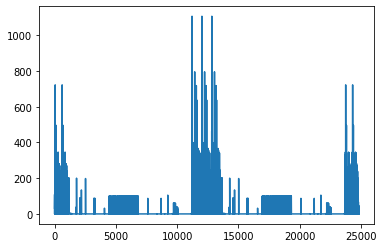

In [552]:
plt.plot(df["Duration in seconds"])

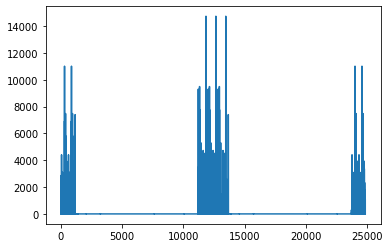

In [553]:
plt.plot(df["Packets"])

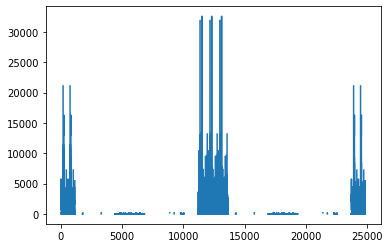

In [554]:
plt.plot(df["Data Speed"])

In [555]:
# df

In [556]:
df["Throughput"] = 0.0
for i in range(0,len(df["Total Size"])):
    val = df["Packets"][i]/df["Duration in seconds"][i]
    if val==np.inf or val==-np.inf:
        val = 10**20
    df["Throughput"][i] = val

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [496]:
# df

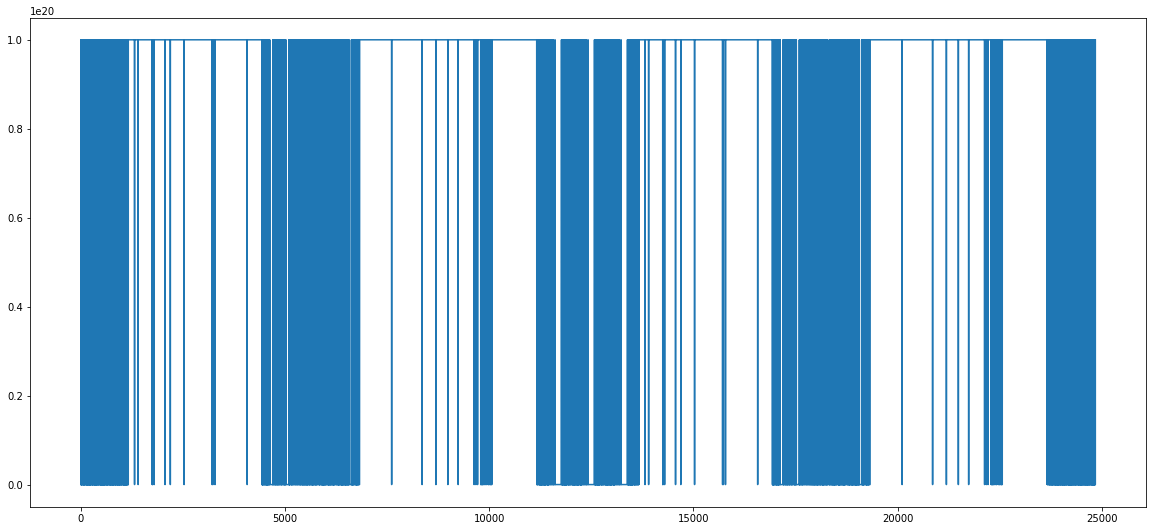

In [561]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(9)
plt.plot(df["Throughput"])

In [562]:
throughput = df["Throughput"]

In [563]:
throughput.replace([np.inf, -np.inf], np.nan, inplace=True)
throughput.dropna(how="all", inplace=True)
throughput

0        6.687500e+00
1        2.769231e+00
2        1.146154e+01
3        6.705882e+00
4        4.000000e+00
             ...     
24837    2.666667e+00
24838    1.000000e+20
24839    1.000000e+20
24840    1.351250e+02
24841    1.000000e+20
Name: Throughput, Length: 24842, dtype: float64

In [564]:
median = throughput.median()
median

1e+20

In [565]:
mean = throughput.mean()
mean

6.894774977858064e+19

In [566]:
df["Anomaly"] = -1
df.replace(np.nan,np.inf,inplace=True)
for i in range(0,len(df["Total Size"])):
    if(df["Throughput"][i]>mean):
#         print(df["Throughput"][i],mean)
        df["Anomaly"][i] = 1
        

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


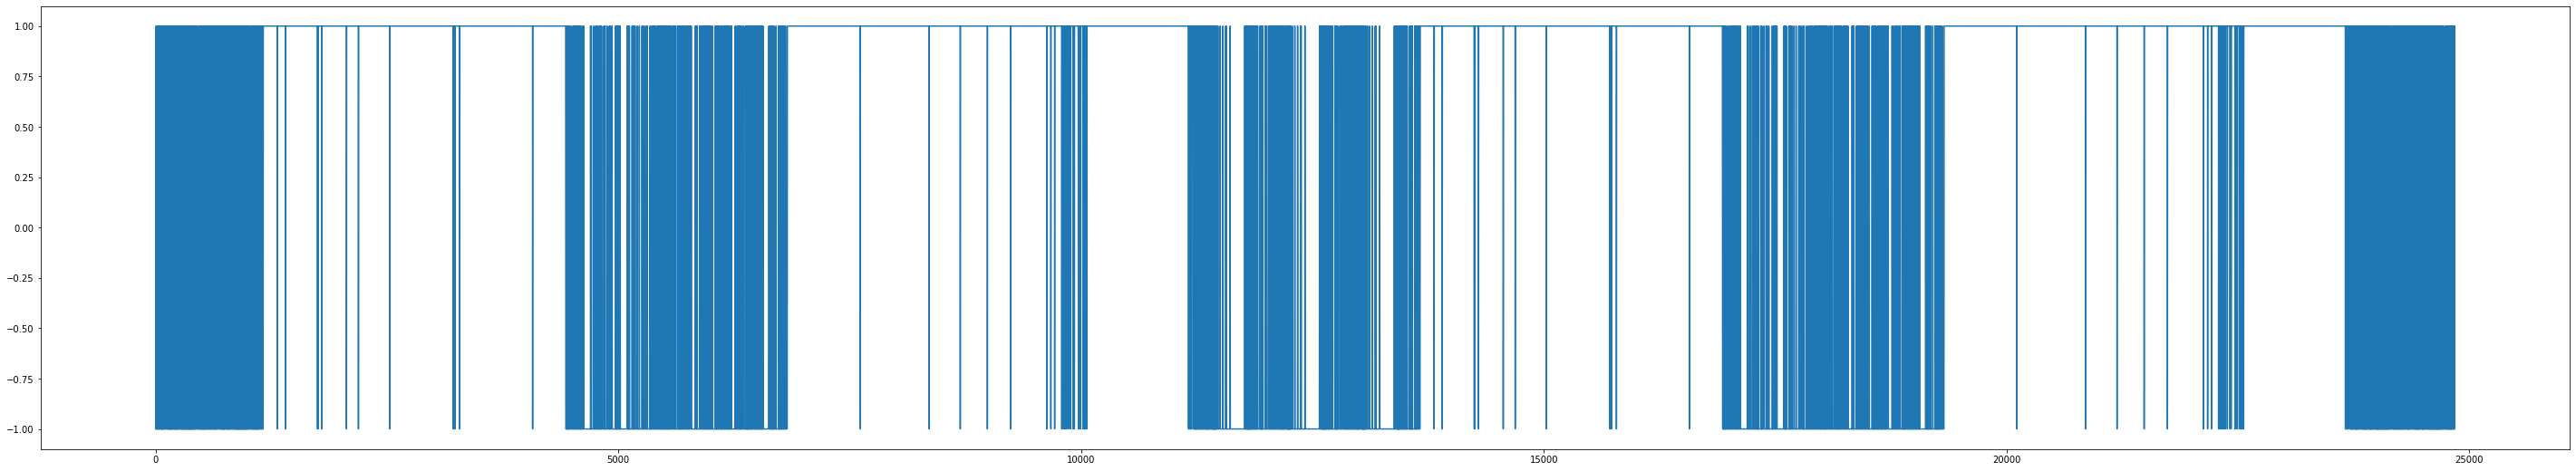

In [567]:
f = plt.figure()
f.set_figwidth(50)
f.set_figheight(9)
plt.plot(df["Anomaly"])

In [568]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score, classification_report
tn, fp, fn, tp = confusion_matrix(df["Attack"], df["Anomaly"]).ravel()
precision = precision_score(df["Attack"], df["Anomaly"])
accuracy = accuracy_score(df["Attack"], df["Anomaly"])
f1_score = f1_score(df["Attack"], df["Anomaly"])

In [569]:
(tn,fp,fn,tp), precision, accuracy, f1_score

((3302, 1390, 4412, 15738),
 0.9188463334890238,
 0.7664439256098543,
 0.8443586029293416)

In [570]:
print(classification_report(df["Attack"], df["Anomaly"]))

              precision    recall  f1-score   support

          -1       0.43      0.70      0.53      4692
           1       0.92      0.78      0.84     20150

    accuracy                           0.77     24842
   macro avg       0.67      0.74      0.69     24842
weighted avg       0.83      0.77      0.79     24842



In [571]:
miss_rate = fn/(fn+tp)
miss_rate

0.2189578163771712

# Entropy

In [572]:
def entropy_calc(data):
    p_data = data.value_counts()           # counts occurrence of each value
    entropy = scipy.stats.entropy(p_data)  # get entropy from counts
    return entropy
df["Entropy throughput"] = 0.0
df["Entropy Remote Address"] = 0.0
df["Entropy Remote Port"] = 0.0
for i in range(0,len(df["Total Size"])):
    df["Entropy throughput"][i] = entropy_calc(df["Throughput"][:i+1])
    df["Entropy Remote Address"][i] = entropy_calc(df["Remote Address"][:i+1])
    df["Entropy Remote Port"][i] = entropy_calc(df["Remote Port"][:i+1])
    
df    

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added bac

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Service Name,Packets,Data Size,Total Size,Data Speed,Capture Time,Last Packet Time,Duration,Attack,Throughput,Duration in seconds,Anomaly,Entropy throughput,Entropy Remote Address,Entropy Remote Port
0,TCP,10.0.2.15,41.63.105.0,49699.0,80.0,http,214,257800,267860,3227.7,10/25/2022 8:39:11 AM:097,10/25/2022 8:39:43 AM:672,00:32.6,-1,6.687500e+00,32,-1,0.000000,0.000000,0.000000
1,TCP,10.0.2.15,41.63.105.128,49709.0,80.0,http,36,32122,33603,667.4,10/25/2022 8:39:12 AM:160,10/25/2022 8:39:25 AM:176,00:13.0,-1,2.769231e+00,13,-1,0.693147,0.693147,0.000000
2,TCP,10.0.2.15,41.63.105.128,49698.0,80.0,http,298,365003,376964,5749.2,10/25/2022 8:39:12 AM:160,10/25/2022 8:39:38 AM:362,00:26.2,-1,1.146154e+01,26,-1,1.098612,0.636514,0.000000
3,TCP,10.0.2.15,117.18.232.240,49696.0,80.0,http,114,131402,136003,2069.7,10/25/2022 8:39:12 AM:176,10/25/2022 8:39:30 AM:012,00:17.8,-1,6.705882e+00,17,-1,1.386294,1.039721,0.000000
4,TCP,10.0.2.15,41.63.105.128,49694.0,80.0,http,4,1461,1662,inf,10/25/2022 8:39:12 AM:176,10/25/2022 8:39:13 AM:332,00:01.2,-1,4.000000e+00,1,-1,1.609438,0.950271,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24837,UDP,10.0.2.15,239.255.255.250,58540.0,1900.0,ssdp,8,1400,1827,29.1,10/25/2022 8:57:04 AM:431,10/25/2022 8:57:07 AM:742,00:03.3,-1,2.666667e+00,3,-1,1.929190,1.281422,8.093012
24838,UDP,10.0.2.15,192.168.0.1,52927.0,53.0,domain,2,217,354,inf,10/25/2022 8:57:06 AM:337,10/25/2022 8:57:06 AM:337,00:00.0,-1,1.000000e+20,0,1,1.929127,1.281484,8.092800
24839,TCP,10.0.2.15,104.120.154.29,50119.0,443.0,https,17,7166,8106,466.5,10/25/2022 8:57:06 AM:415,10/25/2022 8:57:07 AM:086,00:00.7,-1,1.000000e+20,0,1,1.929064,1.281612,8.092570
24840,TCP,10.0.2.15,41.63.105.128,50120.0,80.0,http,1081,1051576,1095283,5462.4,10/25/2022 8:57:07 AM:279,10/25/2022 8:57:15 AM:571,00:08.3,-1,1.351250e+02,8,-1,1.929344,1.281751,8.092377


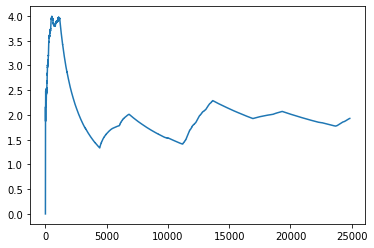

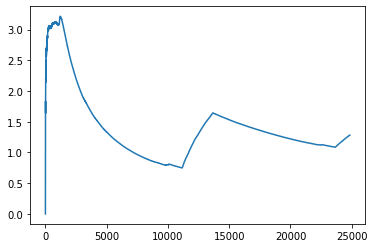

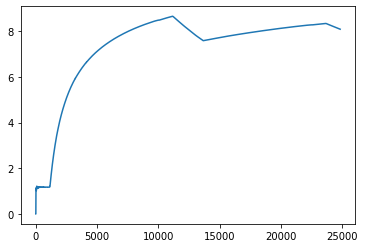

In [573]:
plt.plot(df["Entropy throughput"])
plt.figure()
plt.plot(df["Entropy Remote Address"])
plt.figure()
plt.plot(df["Entropy Remote Port"])

In [578]:
## Entropy throughput anomaly detection
df["Anomaly entropy based"] = -1
df["Anomaly port entropy based"] = -1
checkval = df["Entropy throughput"][0]
check_port = df["Entropy Remote Port"][0]
for i in range(0,len(df["Total Size"])):
    if df["Entropy throughput"][i]<checkval:
        df["Anomaly entropy based"][i] = 1
    if df["Entropy Remote Port"][i]>check_port:
        df["Anomaly port entropy based"][i] = 1
    check_port = df["Entropy Remote Port"][i]
    checkval = df["Entropy throughput"][i]
# df["Entropy throughput"][0],checkval,type(df["Entropy throughput"][0]),type(checkval),df["Entropy throughput"][i]<checkval

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


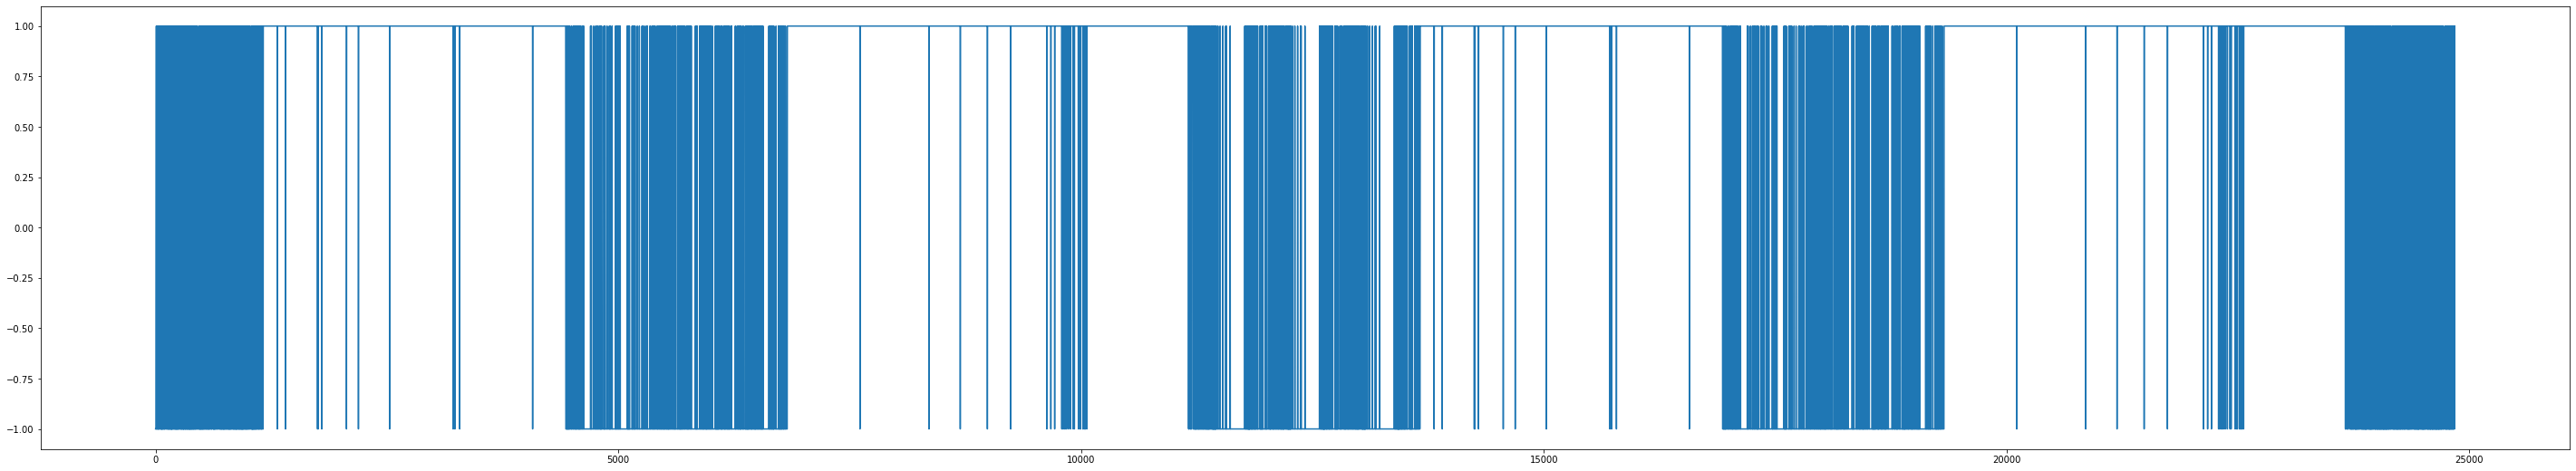

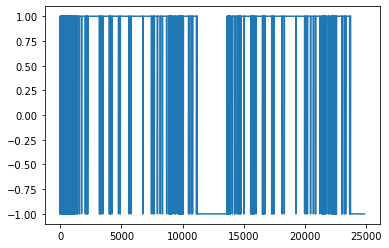

In [579]:
f = plt.figure()
f.set_figwidth(50)
f.set_figheight(9)
plt.plot(df["Anomaly entropy based"])
plt.figure()
plt.plot(df["Anomaly port entropy based"])

In [576]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score, classification_report
tn, fp, fn, tp = confusion_matrix(df["Attack"], df["Anomaly entropy based"]).ravel()
precision = precision_score(df["Attack"], df["Anomaly entropy based"])
accuracy = accuracy_score(df["Attack"], df["Anomaly entropy based"])
f1_score = f1_score(df["Attack"], df["Anomaly entropy based"])
(tn,fp,fn,tp), precision, accuracy, f1_score

((3257, 1435, 4411, 15739),
 0.9164434610457669,
 0.7646727316641172,
 0.843371557175008)

In [580]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score, classification_report
tn, fp, fn, tp = confusion_matrix(df["Attack"], df["Anomaly port entropy based"]).ravel()
precision = precision_score(df["Attack"], df["Anomaly port entropy based"])
accuracy = accuracy_score(df["Attack"], df["Anomaly port entropy based"])
f1_score = f1_score(df["Attack"], df["Anomaly port entropy based"])
(tn,fp,fn,tp), precision, accuracy, f1_score

((4355, 337, 381, 19769),
 0.983238834178852,
 0.9710973351581998,
 0.9821641494435612)

# SVM

In [340]:
from sklearn.svm import OneClassSVM
# dfsvm = df[["Local Port","Remote Port","Packets","Data Size","Total Size","Data Speed","Capture Time","Last Packet Time","Duration","Throughput","Duration in seconds"]]
model = OneClassSVM(kernel = 'poly', gamma = 0.001, nu = 0.03).fit(df[["Packets","Data Size","Total Size","Throughput","Duration in seconds"]])

In [341]:
# df[df["Data Speed"]==np.inf]
# type(df["Data Speed"][4])
y_pred = model.predict(df[["Packets","Data Size","Total Size","Throughput","Duration in seconds"]])

In [342]:
tn, fp, fn, tp = confusion_matrix(df["Attack"], y_pred).ravel()
precision = precision_score(df["Attack"], y_pred)
accuracy = accuracy_score(df["Attack"], y_pred)
# f1_score = f1_score(df["Attack"], y_pred)
# y_pred
print((tn,fp,fn,tp), precision, accuracy)
print(classification_report(df["Attack"], y_pred))

(201, 3924, 0, 7128) 0.6449511400651465 0.6512929885363903
              precision    recall  f1-score   support

          -1       1.00      0.05      0.09      4125
           1       0.64      1.00      0.78      7128

    accuracy                           0.65     11253
   macro avg       0.82      0.52      0.44     11253
weighted avg       0.78      0.65      0.53     11253



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
# https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a